<a href="https://colab.research.google.com/github/aschelin/SimulacoesAGFE/blob/main/SC_integrador_scipy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Neste tutorial usamos o pacote scipy.odeint para integrar as equações de movimento de um íon em um campo cruzado $\vec{E}\times \vec{B}$

In [ ]:
import scipy as sci
import scipy.integrate
import numpy as np
import matplotlib.pyplot as plt 
plt.style.use('seaborn-poster')

In [ ]:


#Initial velocity [m/s]
vy0 = 1.0e6
y0 = np.array( [ 0, 0.0, 0.0, 0.0, vy0, 0.0 ] )


In [ ]:
# Definindo a função dy/dx = f(x,y)
def funLarmor(Y,t):
   x = Y[0]
   y = Y[1]
   z = Y[2]
   vx = Y[3]
   vy = Y[4]
   vz = Y[5]
   # Parâmetros físicos:

   qe = 1.60217662e-19
   me = 9.10938356e-31
   B0 = 0.1
   # Razao carga/ massa (q/m)
   qm = -qe/me
   # Campo elétrico [V/m]
   Ex = 0.0
   Ey = 100
   Ez = 0.0
   # Campo magnético B [T]
   Bx = 0.0
   By = 0.0
   Bz = 1.0e-4
   # Equacoes de Newton-Lorentz  (em coordenadas Cartesianas)
   ax = qm * Ex + qm*( Bz*vy - By*vz )
   ay = qm * Ey + qm*( Bx*vz - Bz*vx )
   az = qm * Ez + qm*( By*vx - Bx*vy )
   ydot = np.array(( vx, vy, vz, ax, ay, az ))
   return ydot

In [ ]:
# Parametros para a integracao
tmax = 1.1e-6 
N = 100 
time_span=np.linspace(0,tmax,N)

In [ ]:
sol =sci.integrate.odeint(funLarmor,y0,time_span)


In [ ]:
sci.integrate.odeint?

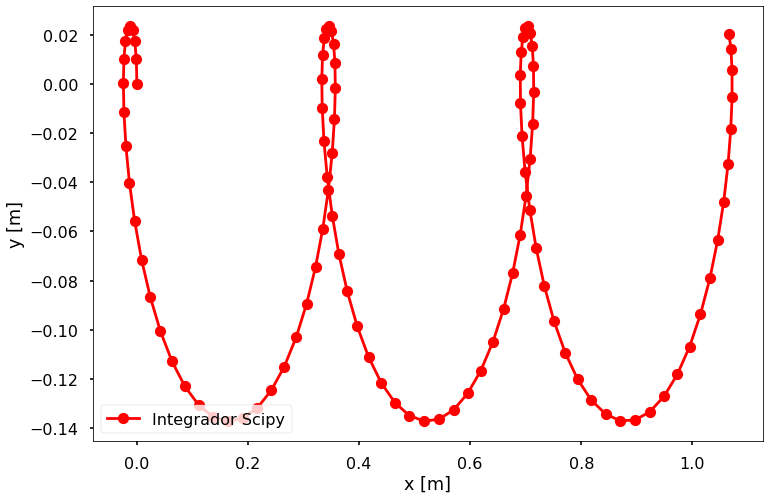

In [ ]:
plt.figure(figsize = (12, 8))
plt.plot( sol[:,0], sol[:,1], 'ro-', label='Integrador Scipy' )
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.legend(loc='lower left')
plt.show()